<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> PAP 4J05 Otoño 2021 </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Edzna Franco Jaramillo </font> <br> <br>

<center><font color=#555555><font size=6> I.F. Ivan Paniagua Garcia de León </font> <br> <br>

<center> <font color= #555555> <font size = 4> Diciembre 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/Ivanpaniagua7/PAP-ML-O2021'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Sistema de trading </font> <br> <br> <font color= #555555> <font size = 5> Este trabajo fue elaborado en el Proyecto de Aplicación Profesional por los alumnos Ivan Paniagua y Edzná Franco. Se elaboró un sistema de trading con base en modelos autoregresivos como lo son los modelos ARIMA; este modelo se encontró por medio de la metodología de Box Jenkins.  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [9]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

## <font color= #6E6E6E> 2.4 Import scripts and libraries</font>

In [10]:
# Importar otros archivos
import data as dt
import functions as fn
import visualizations as vs

# Importar librerias
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})
warnings.filterwarnings("ignore")

<br>

# <font color= #6B6B6B> 3. Análisis exploratorio de datos </font>


<hr style="border:0.02in solid gray"> </hr>

## <font color= #6E6E6E> 3.1 Descargar precios de cierre históricos y dividirlos por día de la semana</font>

In [11]:
# Descargar los precios de cierre del Bitcoin
Cierres = dt.get_adj_closes('BTC-USD', "2019,01,09", "2021,28,11").shift().dropna()
Cierres = Cierres.loc["2019-09-27":]
btc = pd.DataFrame(Cierres["Close"].loc["2019-09-27":"2021-09-27"])
btc.head(5)

,Close
Date,
2019-09-27,8118.967773
2019-09-28,8251.845703
2019-09-29,8245.915039
2019-09-30,8104.185547
2019-10-01,8293.868164


In [12]:
# Dividir la serie de tiempo por día de la semana
fechas = fn.serie_weekdays(btc)
fechas.head(3)

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
0,8104.185547,8293.868164,8343.276367,8393.041992,8118.967773,8251.845703,8245.915039
1,7988.155762,8245.623047,8228.783203,8595.740234,8259.992188,8205.939453,8151.500488
2,8321.005859,8374.686523,8205.369141,8047.526855,8586.473633,8321.756836,8336.555664


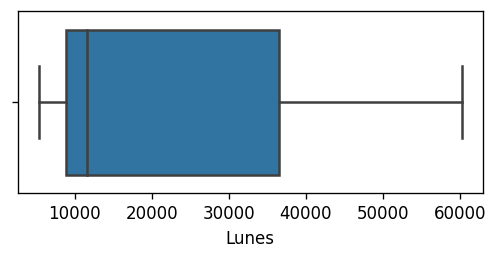

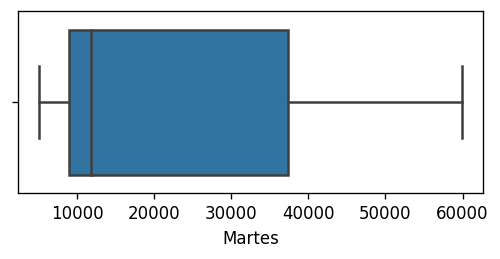

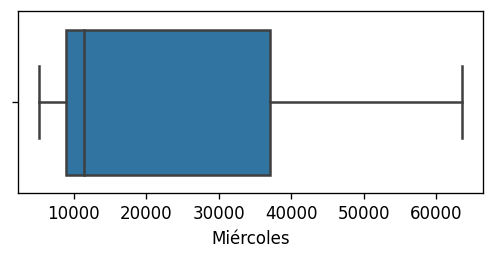

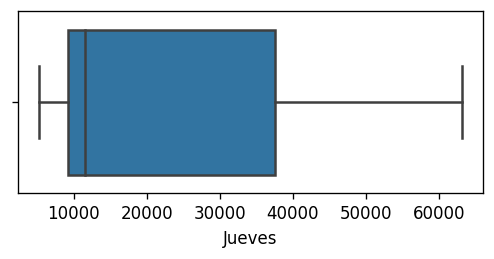

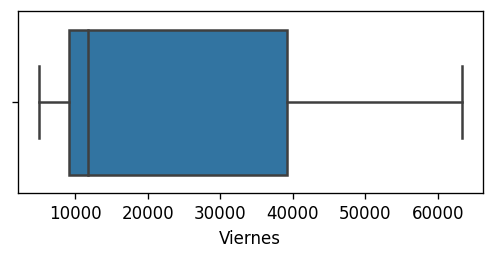

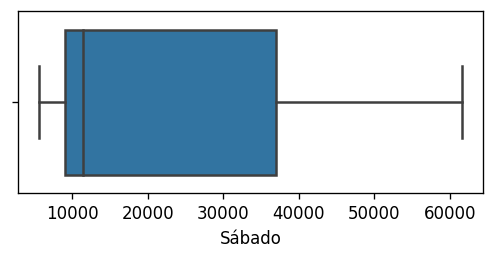

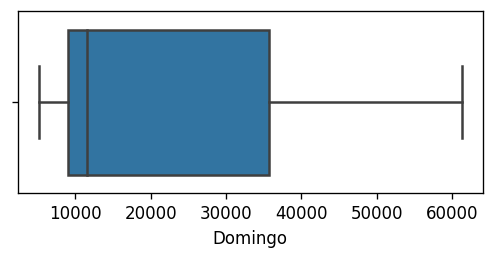

In [13]:
vs.caja_bigotes(fechas["Lunes"])
vs.caja_bigotes(fechas["Martes"])
vs.caja_bigotes(fechas["Miércoles"])
vs.caja_bigotes(fechas["Jueves"])
vs.caja_bigotes(fechas["Viernes"])
vs.caja_bigotes(fechas["Sábado"])
vs.caja_bigotes(fechas["Domingo"])

In [14]:
# Calcular el CO, HO, OL, HL así como su cambio en PIPs
conteo = fn.conteo_calculos(Cierres)
conteo.head(2)

,CO,CO pips,HO,HO pips,OL,OL pips,HL,HL pips
Date,,,,,,,,
2019-09-27,-368.702148,-3.687021,28.015625,0.280156,592.040527,5.920405,620.056152,6.200562
2019-09-28,138.744629,1.387446,158.419434,1.584194,147.178223,1.471782,305.597656,3.055977


# <font color= #6B6B6B> 2. Metodolodía Box Jenkins </font>


La metodología Box-Jenkins se podría definir como un ciclo iterativo que busca encontrar el mejor modelo de ajuste para la realización de pronósticos y estimaciones.

**Pasos a seguir en la Metodología Box-Jenkins**:

> **Paso 0: Identificar si la serie es estacionaria**

Una serie temporal es estacionaria cuando la media y la variabilidad se mantienen constantes a lo largo del tiempo, es decir, no es en función del tiempo; y además, no presenta tendencia.

<img style="float: center" src="https://estrategiastrading.com/wp-content/uploads/2016/12/media_estacionaria.png" >


Si las graficas de autocorrelación y autocorrelación parcial muestran varios rezagos bastante significativos, es decir, que sobre pasen el intervalo de confianza (la línea sombreada azul), indica que no es estacionaria la serie original por lo que debemos de hacer una diferenciación y volver a verificar con los mismos graficos. 

<Figure size 600x240 with 0 Axes>

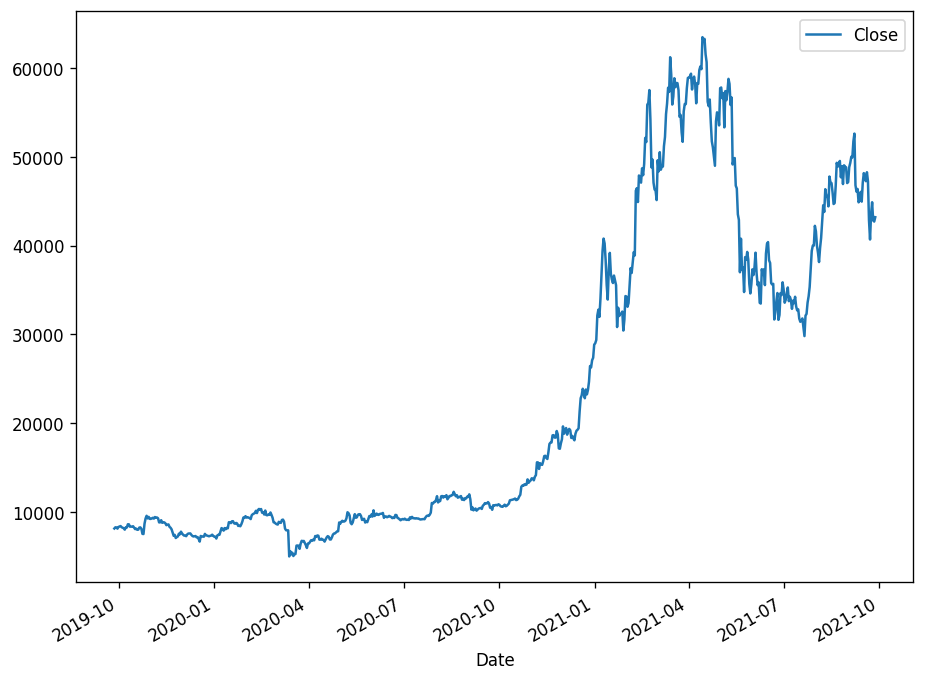

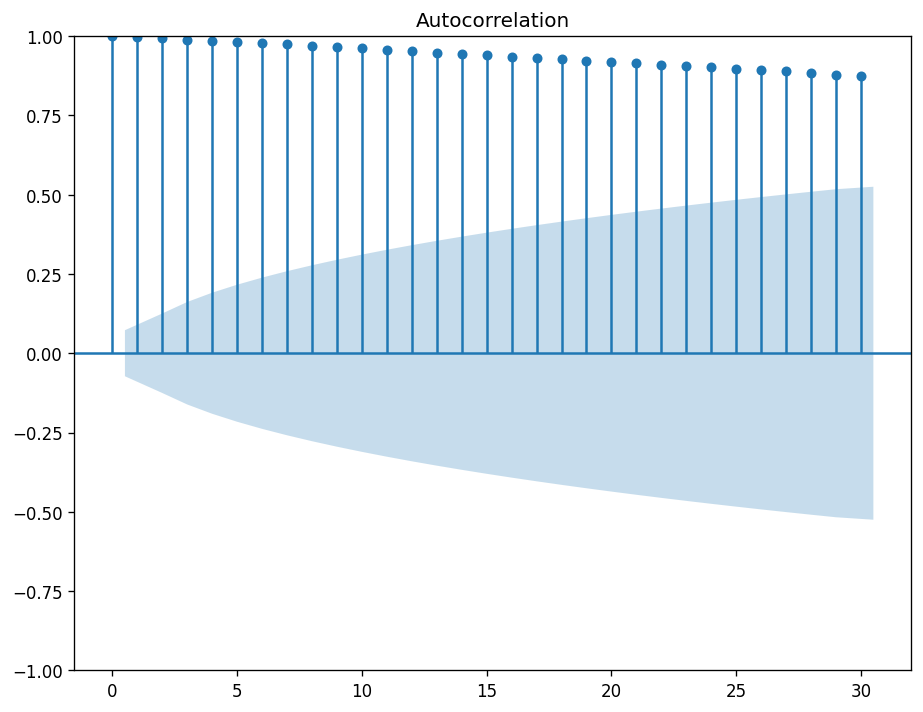

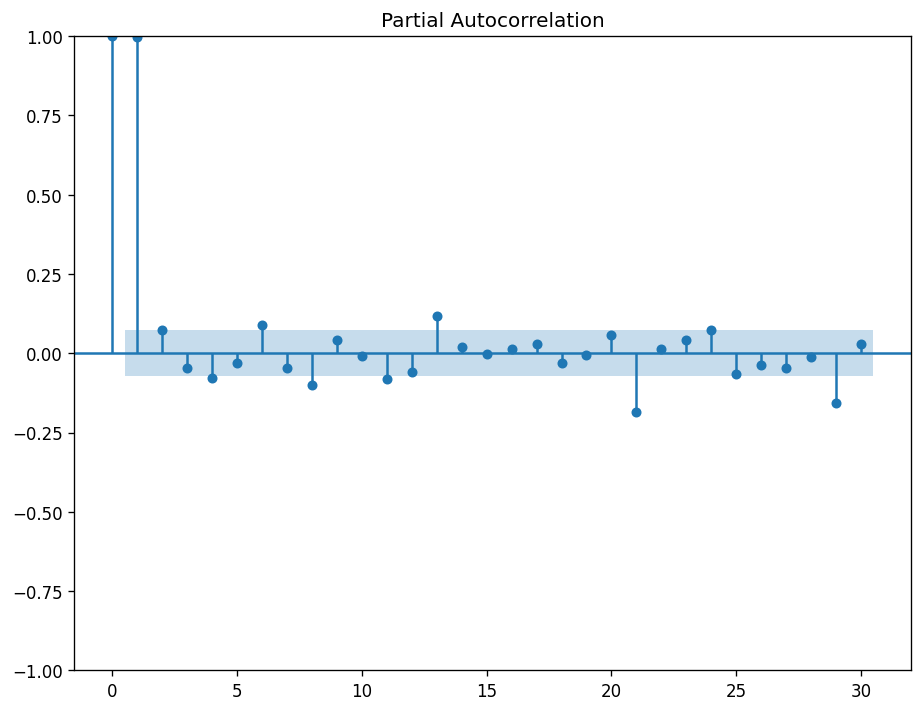

In [15]:
# Paso 0: Identificar si la serie es estacionaria
# Graficar FAC y FACP para la serie original
btc = pd.DataFrame(btc["Close"])
plt.figure(figsize=(5, 2))
btc.plot()
plt.show()
plot_acf(btc, lags=30)
plt.show()
plot_pacf(btc, lags=30)
plt.show()

Podemos observar que tanto la gráfica de la evolución de la serie no tiene la forma que buscamos indicando estacionariedad, por lo que es probable que no sea estacionaria; al mismo tiempo, la serie muestra rezagos significatuvos en ambas graficas de autocorrelación y autocorrelación parcial.


Para verificar que la serie no es estacionaria, realizaremos la prueba **Prueba de Dickey - Fuller**.

Dickey-Fuller es utilizado para comprobar la presencia de tendencia sobre las series temporales. La particularidad del  Dickey-Fuller es que es la herramienta más fácil de usar comparado con otros contrastes más complejos que también prueban la presencia de tendencia en los datos. Esta prueba presenta las siguientes hipótesis:


$H_0$: **La serie es NO estacionaria**: Tiene raíz unitaria y el p-value es **mayor** a 0.05

$H_1$: **La serie SI es estacionaria**: No tiene raíz unitaria y el p-value es **menor** a 0.05

In [16]:
# Prueba Dickey Fuller
orig_DF = fn.pruebaDickeyFuller(btc)
orig_DF

Test Statistic                  -0.787969
p-value                          0.822630
#Lags Used                      12.000000
Number of Observations Used    715.000000
Critical Value (1%)             -3.439529
Critical Value (5%)             -2.865591
Critical Value (10%)            -2.568927
dtype: float64

La serie original no es estacionaria ya que aceptamos la hipótesis nula, y el p-value es mayor a 0.05.

Procedemos a calcular la primera diferencia de la serie y realizaremos los mismos pasos solo que con la serie diferenciada.

In [17]:
# Calcular la primera diferencia de la serie
diff1 = btc.diff().dropna()
diff1_DF = fn.pruebaDickeyFuller(diff1)
diff1_DF

Test Statistic                -7.669583e+00
p-value                        1.606915e-11
#Lags Used                     1.100000e+01
Number of Observations Used    7.150000e+02
Critical Value (1%)           -3.439529e+00
Critical Value (5%)           -2.865591e+00
Critical Value (10%)          -2.568927e+00
dtype: float64

La serie SI es estacionaria pues rechazamos la hipótesis nula ya que el p-value es menor a 0.05

Así como con la serie original, hacemos los gráficos de autocorrelación y autocorrelación parcial para verificar que no haya rezagos muy significativos. Por medio de estos mismos gráficos podremos encontrar los parámetros del modelo; estos parámetros son "p", "d" y "q", donde cada uno significa lo siguiente:

- Función de autocorrelación (ACF):
> MA(q): Solo los q primeros coeficientes son significativos. El resto se anulan bruscamente (coef. 0 para retardo >q)

- Función de autocorrelación parcial (ACFP)
> Solo los p primeros coeficientes son significativos. El resto se anulan bruscamente (coef. 0 para retardo >q)

> **Paso 1. Identificación del modelo (Selección tentativa de p, d, q)**  

En esta etapa determinamos el modelo y el orden de estos que mejor se ajustan a estos datos, es decir, encontramos valores apropiados de p, d y q. En esta etapa utilizamos métodos gráficos, el correlograma y el correlograma parcial.

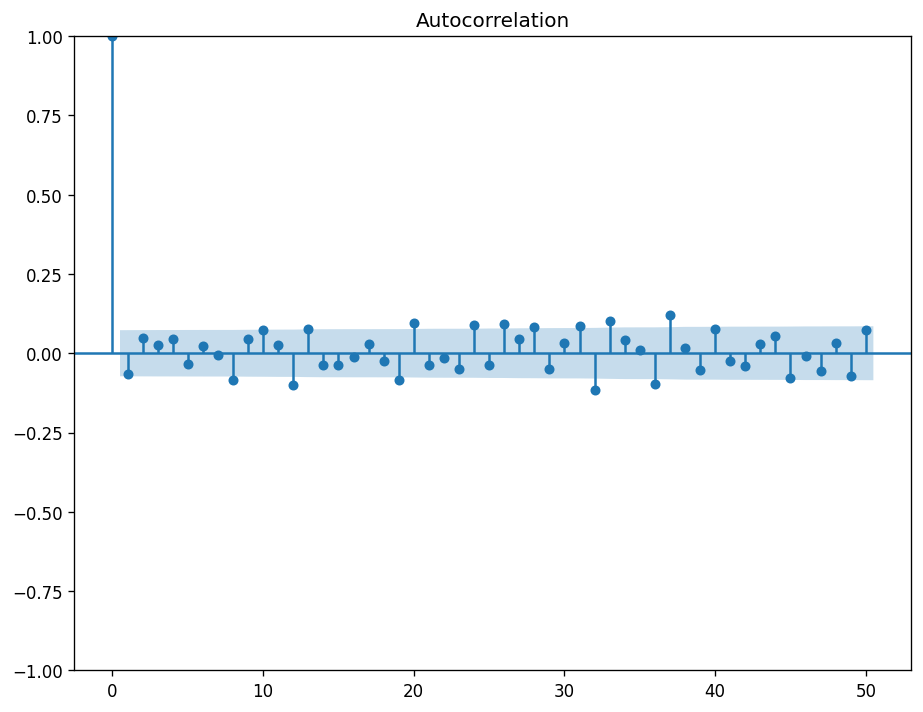

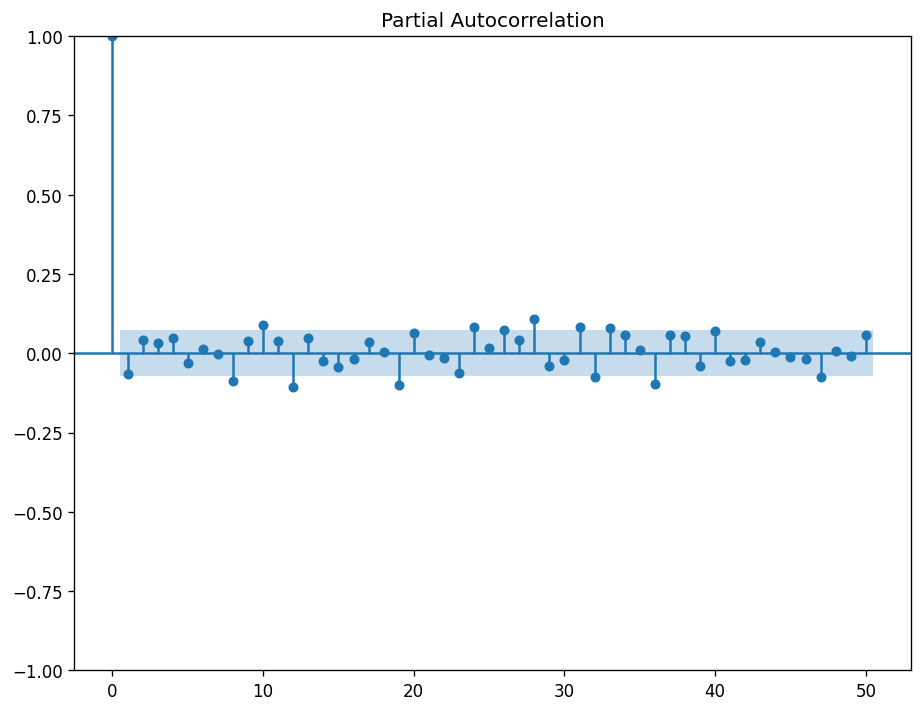

In [18]:
# Paso 1: Identificación del modelo
# Graficar FAC y FACP para la primera diferencia
plot_acf(diff1, lags=50)
plt.show()
plot_pacf(diff1, lags=50)
plt.show()

Por medio de la interpretación visual de las gráficas, podemos establecer los siguientes posibles modelos:

- ARIMA(1,1,1)
- ARIMA(8,1,8)
- ARIMA(10,1,10)
- ARIMA(12,1,7)
- ARIMA(12,1,12)
- ARIMA(19,1,13)
- ARIMA(20,1,20)
- ARIMA(23,1,24)
- ARIMA(24,1,26)
- ARIMA(26,1,28)
- ARIMA(29,1,31)
- ARIMA(31,1,33)
- ARIMA(32,1,36)
- ARIMA(33,1,37)
- ARIMA(36,1,40)
- ARIMA(40,1,45)
- ARIMA(47,1,50)

Donde el término *p* sale de la gráfica de autocorrelación y el término *q* de la gráfica de autocorrelación parcial.



> **Paso 2. Estimación de parámetros del metódo elegido** 

Estimar el modelo seleccionado, es decir estimar los parámetros de los términos autorregresivos y de promedios móviles incluidos en el modelo. Este cálculo puede efectuarse mediante mínimos cuadrados simples, pero puede recurrirse a métodos de estimación no lineal en los parámetros.
 

In [19]:
# Paso 2: Estimación de parámetros del método elegido
modelo1 = fn.model_fit(btc, 8, 1, 8)
modelo1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51155D+00    |proj g|=  8.43076D-02

At iterate    5    f=  8.50107D+00    |proj g|=  3.42641D-02


 This problem is unconstrained.



At iterate   10    f=  8.48340D+00    |proj g|=  1.48858D-01

At iterate   15    f=  8.47658D+00    |proj g|=  2.73529D-02

At iterate   20    f=  8.47551D+00    |proj g|=  2.26382D-02

At iterate   25    f=  8.47454D+00    |proj g|=  7.79875D-03

At iterate   30    f=  8.47426D+00    |proj g|=  7.71201D-03

At iterate   35    f=  8.47388D+00    |proj g|=  9.88902D-03

At iterate   40    f=  8.47318D+00    |proj g|=  2.19636D-02

At iterate   45    f=  8.47261D+00    |proj g|=  1.18718D-02

At iterate   50    f=  8.47214D+00    |proj g|=  1.70537D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     58   

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  728
Model:               SARIMAX(8, 1, 8)   Log Likelihood               -6167.715
Date:                Mon, 22 Nov 2021   AIC                          12369.430
Time:                        13:03:17   BIC                          12447.442
Sample:                             0   HQIC                         12399.533
                                - 728                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1475      1.675     -0.088      0.930      -3.431       3.136
ar.L2         -0.0279      1.716     -0.016      0.987      -3.392       3.336
ar.L3         -0.2551      1.596     -0.160      0.873      -3.383       2.873
ar.L4          0.5408      1.896      0.285      0.775      -3.174       4.256
ar.L5          0.0610      0.851      0.072      0.943      -1.608       1.729
ar.L6          0.3061      0.730      0.419      0.675      -1.125       1.738
ar.L7          0.5914      0.229      2.585      0.010       0.143       1.040
ar.L8         -0.3924      0.792     -0.495      0.620      -1.945       1.160
ma.L1          0.1027      1.677      0.061      0.951      -3.183       3.389
ma.L2          0.1062      1.637      0.065      0.948      -3.102       3.314
ma.L3          0.3263      1.660      0.197      0.844      -2.927       3.580
ma.L4         -0.5241      2.071     -0.253      0.800      -4.583       3.535
ma.L5         -0.0044      1.036     -0.004      0.997      -2.034       2.025
ma.L6         -0.2897      0.999     -0.290      0.772      -2.247       1.668
ma.L7         -0.6481      0.477     -1.360      0.174      -1.582       0.286
ma.L8          0.2999      0.647      0.463      0.643      -0.969       1.569
sigma2      1.464e+06   4.58e+04     31.941      0.000    1.37e+06    1.55e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1184.99
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              28.38   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

> 3. **Pruebas a los residuales:** 

Después de seleccionar un modelo ARIMA en particular y de estimar sus parámetros, veremos si el modelo seleccionado se ajusta adecuadamente a nuestros datos ya que en caso de que no, puede que exista otro modelo ARIMA que se ajuste mejor a los datos, para esto existen dos métodos: El primero consiste en crear un modelo con más rezagos para identificar que no sean estadísticamente significativos. 

El segundo consiste en analizar los residuos del modelo seleccionado. Esta etapa es fundamental para continuar con el pronóstico, ya que en caso contrario es necesario volver al paso uno y replantear la metodología, esto lo comprobaremos mediante diversas pruebas

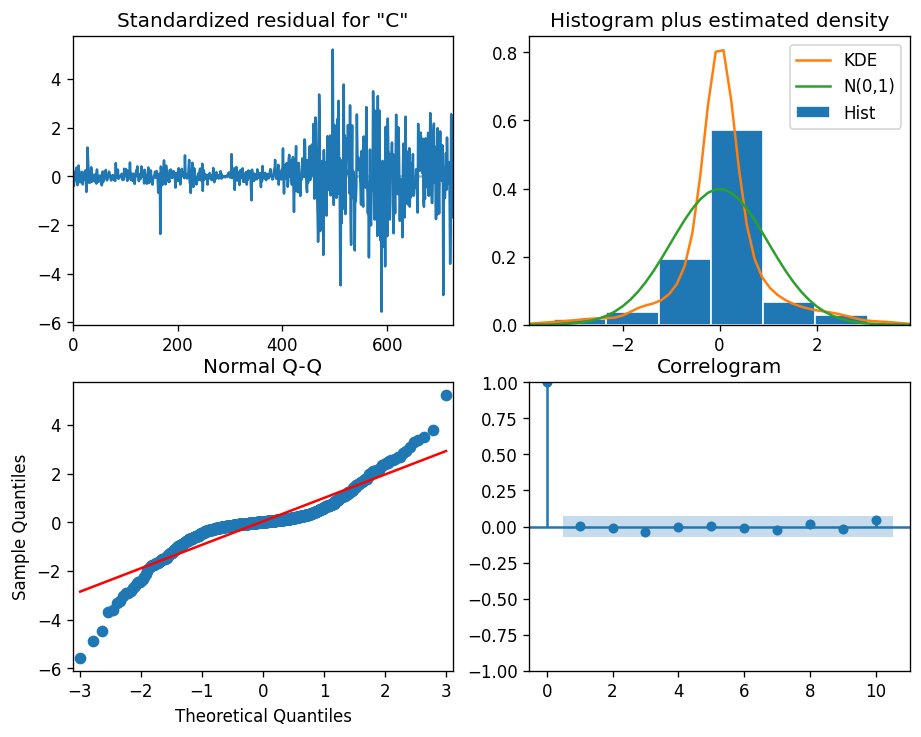

In [20]:
modelo1.plot_diagnostics()
plt.show()

**Prueba de normalidad de los residuales**

Esta prueba busca probar que los residuales se distribuyen de forma normal, por lo que plantea las siguientes hipótesis:

$H_0$: Los residuales **SI** se distribuyen de forma normal y tienen un p-value **menor** a 0.05

$H_A$: Los residuales **NO** se distribuyen de forma normal y tienen un p-value **mayor** a 0.05

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [21]:
residuales_1 = pd.DataFrame(modelo1.resid)
fn.prueba_normalidad(residuales_1)

statistic 0.841883659362793
P-value= 2.772467366987592e-26
Los residuales se distrubuyen de forma normal.


> Aceptamos la hipótesis nula por lo que podemos decir que los residuales se distribuyen de forma normal debido a que el p value es menor a 0.05.

**Prueba de Ljung-Box**


La prueba de Ljung-Box es una prueba estadística que *verifica si existe autocorrelación* en una serie de tiempo.

Utiliza las siguientes hipótesis:

$H_0$ : Los residuos se distribuyen de forma independiente.

$H_A$ : Los residuos no se distribuyen de forma independiente; exhiben correlación serial.

Idealmente, nos gustaría no rechazar la hipótesis nula. Es decir, nos gustaría ver que el valor p de la prueba sea mayor que 0.05 porque esto significa que los residuos de nuestro modelo de series de tiempo son independientes, lo que a menudo es una suposición que hacemos al crear un modelo.

In [22]:
fn.ljung_box(residuales_1)

,lb_stat,lb_pvalue
50,39.352983,0.860669


> Aceptamos la hipótesis nula, por lo que los residuos se distribuyen de forma independiente debido a que el p value es mayor a 0.05.

**Prueba de heterocedasticidad**

Two-sided: 

Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

In [23]:
fn.heterocedasticidad(residuales_1)

(8.620804423356155, 5.1030911631552066e-54)

In [32]:
def Rsquared(data, modelo):
    test = data["Close"].reset_index()
    testini = test[test['Date'] == "2021-09-27"].index.values[0]
    testfin = test[test['Date'] == "2021-10-28"].index.values[0]
    test = test["Close"].loc[testini:testfin]
    
    forecast = modelo.predict(start=testini, end=testfin, dynamic=True)
    
    num = sum((test-forecast)**2)
    den = sum((test - test.mean())**2)
    Rsq = 1 - (num/den)
    
    return Rsq

Rsquared(Cierres, modelo1)

-3.107166536334937

> Aceptamos la hipótesis nula dado que el coeficiente de determinación es menor al p value de la prueba de hetorocedasticidad.

> 4. **Pronóstico** 

La popularidad de estos modelos, esta en la capacidad de éxito en el pronóstico, que en muchas ocasiones resulta mejor que modelos tradicionales de econometría y otros modelos normativos de teoría financiera. En esta etapa final realizaremos inferencias y pronósticos con el modelo estimado para la toma de decisiones de inversión a corto plazo.



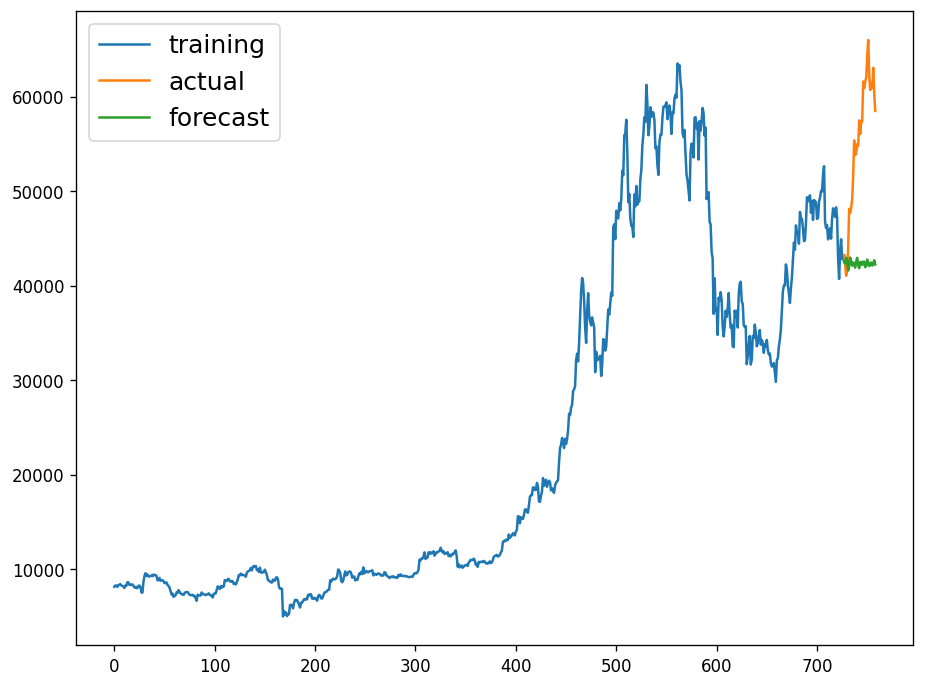

In [24]:
vs.grafica_forecast(Cierres, btc, modelo1)

> Tenemos esta predicción dado que el modelo funciona bien cuando se realizan predicciones de uno a dos días, sin embargo como estamos prediciendo 30 días, notamos que la gráfica de forecast no ajusta de manera correcta después de los primeros días.

<br>

# <font color= #6B6B6B> 4. A particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [25]:
# DELETE THIS CELL IN YOUR FILE

# A particular process that is relevant for the work you are presenting.

<br>

# <font color= #6B6B6B> 5. Another particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

In [26]:
# DELETE THIS CELL IN YOUR FILE

# Another particular process that is relevant for the work. Normally, you include between 2 and 5 at the most.

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [27]:
# DELETE THIS CELL IN YOUR FILE

# In here you present the general results, and also, a discussion of such results.

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

In [28]:
# DELETE THIS CELL IN YOUR FILE

# Separate your results according to the main processes you are working on

<br>

## <font color= #6B6B6B> 5.2 Results of another proces </font>

In [29]:
# DELETE THIS CELL IN YOUR FILE

# You can have several processes with which you are obtaining the results you need.

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

In [30]:
# DELETE THIS CELL IN YOUR FILE

# Citations, and other references you are using.

# DO INCLUDE THE FOLLOWING CITATION FOR THIS TEMPLATE

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>